<a href="https://colab.research.google.com/github/sanmevv/Turkey-Syria-Earthquake-Disaster-management-/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom	    test_data.csv    tweets.csv
'Colab Notebooks'   train_data.csv   val_data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/tweets.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,9,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,...,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text
0,0.0,757789706,MiteiBn,1634645186557910000,3/11/23 7:59 PM,@asamoh_ you did this to @benjindolo? ile eart...,en,NaN,"<a href=""http://twitter.com/download/android"" ...",0,...,560,51,5170.0,59:39.3,https://twitter.com/MiteiBn/status/16346451865...,0.000000,@ asamoh_ @ benjindolo ? ile earthquake utapat...,@ asamoh_ you did thi to @ benjindolo ? ile ea...,0 days 19:59:39.316403,you did this to ile earthquake utapata bado i...
1,1.0,2577625848,mayorofreading,1634644607660160000,3/11/23 7:56 PM,today we marked #internationalwomansday2023 &a...,en,"Reading, Berks, UK","<a href=""http://twitter.com/download/android"" ...",0,...,296,2762,3628.0,59:39.3,https://twitter.com/mayorofreading/status/1634...,0.050000,today marked # internationalwomansday2023 & am...,today we mark # internationalwomansday2023 & a...,0 days 19:59:39.316778,today we marked fundraised for the survivors ...
2,2.0,2612668305,gbibuildingco,1634642552858060000,3/11/23 7:48 PM,please don't forget these people!\r\n\r\npleas...,en,USA - Worldwide,"<a href=""http://twitter.com/download/android"" ...",0,...,30302,28925,192393.0,59:39.3,https://twitter.com/gbibuildingco/status/16346...,0.000000,please n't forget people ! please share friend...,pleas do n't forget these peopl ! pleas share ...,0 days 19:59:39.317303,please dont forget these people please share w...
3,3.0,1439507181456560000,vitalmenopause,1634642520616450000,3/11/23 7:48 PM,the state of the u.k. a us bank just went un...,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,...,75,12,552.0,59:39.3,https://twitter.com/vitalmenopause/status/1634...,0.000000,state u.k. us bank went . dutch farmers prote...,the state of the u.k. a us bank just went und...,0 days 19:59:39.317470,the state of the uk a us bank just went under ...
4,4.0,1311742486835060000,stuart_coop,1634636363147400000,3/11/23 7:24 PM,devastating earthquakes have killed thousands ...,en,"Aberfeldy, Scotland","<a href=""https://www.sprinklr.com/"" rel=""nofol...",0,...,295,274,3563.0,59:39.3,https://twitter.com/stuart_coop/status/1634636...,-0.316667,devastating earthquakes killed thousands turke...,devast earthquak have kill thousand in turkey ...,0 days 19:59:39.317654,devastating earthquakes have killed thousands ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170103,170102.0,24216744,AryehsSharings,10992399367,3/11/23 6:40 PM,#emsc md 2.9 turkey-syria border region: 201...,en,"Lima, Peru","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,...,298,1206,878230.0,58:02.0,https://twitter.com/AryehsSharings/status/1099...,-0.050000,# emsc md 2.9 turkey-syria border region : 201...,# emsc md 2.9 turkey-syria border region : 201...,4735 days 21:58:01.994322,md turkeysyria border region 03241752385 utc l...
170104,170103.0,24216744,AryehsSharings,10989793343,3/11/23 5:35 PM,#emsc md 2.7 turkey-syria border region: 201...,en,"Lima, Peru","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,...,298,1206,878230.0,58:02.0,https://twitter.com/AryehsSharings/status/1098...,-0.050000,# emsc md 2.7 turkey-syria border region : 201...,# emsc md 2.7 turkey-syria border region : 201...,4735 days 21:58:01.994477,md turkeysyria border region 03241656426 utc l...
170105,170104.0,24216744,AryehsSharings,10943584092,3/11/23 9:00 PM,#emsc md 3.0 turkey-syria border region: 201...,en,"Lima, Peru","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,...,298,1206,878230.0,58:02.0,https://twitter.com/AryehsSharings/status/1094...,-0.050000,# emsc md 3.0 turkey-syria border region : 201...,# emsc md 3.0 turkey-syria border region : 201...,4736 days 21:58:01.994611,md turkeysyria border region 03231922482 utc l...
170106,170105.0,24216744,AryehsSharings,10918560914,3/11/23 10:07 AM,#emsc md 2.9 turkey-s

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Loading pytorch packages.

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=eda70c90f4f12c8fdc59c30f67b9524bfa4cc9799c09bc1a2df8fa3bdae54825
  Stored in directory: /root/.cache/pip/wheels/77/b4/c8/395804b9a2b6864aaff3623d7b709680acc3d04f47c8162ee6
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.1
    Uninstalling en-core-web-sm-3.4.1:
      Successfully uninstalled en-core-web-sm-3.4.1


/usr/local/lib/python3.8/dist-packages/spacy/util.py:885: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.4.4,<3.5.0
  warnings.warn(warn_msg)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the tweet data into a Pandas dataframe
tweet_data = pd.read_csv('/content/drive/MyDrive/tweets.csv')

# Shuffle the data
tweet_data = tweet_data.sample(frac=1).reset_index(drop=True)

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(tweet_data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Save the resulting datasets as separate files or data frames
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [ ]:
trainv = pd.read_csv('/content/drive/MyDrive/train_data.csv')
testv = pd.read_csv('/content/drive/MyDrive/test_data.csv')

In [ ]:
# Taking general look at the both datasets.
display(trainv.sample(5))

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text
72333,43548.0,1573685009260630000,AhmedAb89367405,1625244827804650000,3/11/23 9:25 PM,may god have mercy on those who died in the ea...,en,NaN,"<a href=""http://twitter.com/download/android"" ...",0,0.0,1,[],92,13,14.0,28:24.1,https://twitter.com/AhmedAb89367405/status/162...,0.000000,may god mercy died earthquake turkey syria may...,may god have merci on those who die in the ear...,26 days 20:28:24.115239,may god have mercy on those who died in the ea...
59002,100425.0,1505701485325460000,JohnBraddock15,1623203333342390000,3/11/23 6:13 AM,the bloody fingerprints of american imperialis...,en,"Wellington, New Zealand","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,1.0,1,[],125,100,944.0,07:53.2,https://twitter.com/JohnBraddock15/status/1623...,-0.400000,bloody fingerprints american imperialism earth...,the bloodi fingerprint of american imperi are ...,31 days 21:07:53.165610,the bloody fingerprints of american imperialis...
13488,159868.0,2773270747,ChYasinAJK,1622532035624550000,3/11/23 9:45 AM,in real pain after seeing the destruction caus...,en,"Kotli, Islamabad, Pakistan","<a href=""http://twitter.com/download/iphone"" r...",3,8.0,51,"['#Earthquake', '#Turkey', '#Syria']",135,3775,582.0,49:45.9,https://twitter.com/ChYasinAJK/status/16225320...,0.200000,real pain seeing destruction caused # earthqua...,in real pain after see the destruct caus by th...,33 days 21:49:45.870760,in real pain after seeing the destruction caus...
77314,52569.0,1082627374422910000,AliGliy,1624763444720270000,3/11/23 1:32 PM,"""the barzani charity foundation continues to d...",en,Kurdistan Region,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,3.0,22,[],246,210,51.0,34:35.6,https://twitter.com/AliGliy/status/16247634447...,0.155556,`` barzani charity foundation continues demons...,`` the barzani chariti foundat continu to demo...,27 days 20:34:35.564962,the barzani charity foundation continues to de...
34696,23985.0,93278931,PavelNosok,1627561275524800000,3/11/23 6:50 AM,"nvirworld continuing csr efforts, launches blu...",en,"Valencia, Spain","<a href=""http://publicize.wp.com/"" rel=""nofoll...",0,0.0,0,[],145,281,580460.0,15:04.3,https://twitter.com/PavelNosok/status/16275612...,0.300000,"nvirworld continuing csr efforts , launches b...","nvirworld continu csr effort , launch blue ro...",19 days 20:15:04.263477,nvirworld continuing csr efforts launches blue...


In [ ]:
display(testv.sample(5))

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text
11759,100738.0,932744762490318000,iorlumun_tso,1623196208029130000,3/11/23 5:45 AM,my thoughts go out to all those affected by th...,en,"Gboko, Nigeria","<a href=""http://twitter.com/download/android"" ...",0,0.0,0,[],397,127,4074.0,08:06.0,https://twitter.com/iorlumun_tso/status/162319...,-0.375,thoughts go affected devastating earthquakes t...,my thought go out to all those affect by the d...,31 days 21:08:05.993223,my thoughts go out to all those affected by th...
2751,145194.0,727995919493431000,zainabjaff93,1622621883580520000,3/11/23 3:42 PM,my prayers and thoughts with people in syria a...,en,Iraq,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,8,"['#earthquake', '#Syria', '#Turkey']",405,250,271.0,39:22.7,https://twitter.com/zainabjaff93/status/162262...,0.000,prayers thoughts people syria turkey # earthqu...,my prayer and thought with peopl in syria and ...,33 days 21:39:22.747094,my prayers and thoughts with people in syria a...
9262,88794.0,1575155612320660000,junesgood,1623421334909850000,3/11/23 8:39 PM,pray for the people in turkey and syria.\r\nes...,en,Kingdom of Saudi Arabia,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0,[],148,183,3272.0,59:51.3,https://twitter.com/junesgood/status/162342133...,0.000,pray people turkey syria . especially 've 13 y...,pray for the peopl in turkey and syria . espec...,31 days 20:59:51.280552,pray for the people in turkey and syria especi...
12125,135520.0,2976182062,Habitat_EME,1622684409366250000,3/11/23 7:51 PM,we at habitat for humanity are praying for the...,en,Europe and the Middle East,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,7.0,13,[],539,2041,3079.0,32:34.4,https://twitter.com/Habitat_EME/status/1622684...,0.175,habitat humanity praying people turkey syria f...,we at habitat for human are pray for the peopl...,33 days 21:32:34.430239,we at habitat for humanity are praying for the...
14707,56422.0,447483557,Sameer_Mehrab,1624517405027310000,3/11/23 9:15 PM,syria and turkey earthquake relief fund \r\n h...,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0,[],269,5607,9692.0,37:17.7,https://twitter.com/Sameer_Mehrab/status/16245...,0.000,syria turkey earthquake relief fund https : //...,syria and turkey earthquak relief fund http : ...,28 days 20:37:17.691428,syria and turkey earthquake relief fund


In [ ]:
# Checking observation and feature numbers for train and test data.

print(trainv.shape)
print(testv.shape)

(122477, 23)
(17011, 23)


Cleaning Text

In [ ]:
# Some basic helper functions to clean text by removing urls, emojis, html tags and punctuations.

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

trainv['Tweet_clean'] = trainv['Tweet'].apply(lambda x: remove_URL(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_emoji(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_html(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_punct(x))

In [ ]:
# Tokenizing the tweet base texts.

trainv['Tokenized'] = trainv['Tweet_clean'].apply(word_tokenize)

trainv.head()

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ..."
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio..."
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ..."
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p..."
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphone"" r...",0,5.0,10,[],3823,6301,4081.0,20:40.2,https://twitter.com/IamManuelClay_/status/1622...,0.338095,powerful earthquakes struck large portion turk...,power earthquak have struck a larg portion of ...,32 days 21:20:40.202493,powerful earthquakes have struck a large porti...,powerful earthquakes have struck a large porti...,"[powerful, earthquakes, have, struck, a, large..."


In [ ]:
# Lower casing clean text.

trainv['Lower'] = trainv['Tokenized'].apply(
    lambda x: [word.lower() for word in x])

trainv.head()

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ..."
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio..."
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ..."
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p..."
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphone"" r...",0,5.0,10,[],3823,6301,4081.0,20:40.2,https://twitter.com/IamManuelClay_/status/1622...,0.338095,powerful earthquakes struck large portion turk...,power earthquak have struck a larg portion of ...,32 days 21:20:40.202493,powerful earthquakes have struck a large porti...,powerful earthquakes have struck a large porti...,"[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, have, struck, a, large..."


In [ ]:
# Removing stopwords.

trainv['Stopwords_removed'] = trainv['Lower'].apply(
    lambda x: [word for word in x if word not in stop])

trainv.head()

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower,Stopwords_removed
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, ghanaian, national, played, ..."
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, billions, wa..."
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ...","[design, earthquakes, 2, key, design, innovati..."
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p...","[1000, dead, turkey, syria, powerful, earthqua..."
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphone"" r...",0,5.0,10,[],3823,6301,4081.0,20:40.2,https://twitter.com/IamManuelClay_/status/1622...,0.338095,powerful earthquakes struck large portion turk...,power earthquak have struck a larg portion of ...,32 days 21:20:40.202493,powerful earthquakes have struck a large porti...,powerful earthquakes have struck a large porti...,"[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, struck, large, portion..."


In [ ]:
# Applying part of speech tags.

trainv['Pos_tags'] = trainv['Stopwords_removed'].apply(nltk.tag.pos_tag)

trainv.head()
trainv.drop['Index',axis=1]
trainv

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, ghanaian, national, played, ...","[(christian, JJ), (atsu, NN), (ghanaian, JJ), ..."
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, billions, wa...","[(turkeysyria, NNS), (earthquake, NN), (europe..."
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ...","[design, earthquakes, 2, key, design, innovati...","[(design, NN), (earthquakes, VBZ), (2, CD), (k..."
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p...","[1000, dead, turkey, syria, powerful, earthqua...","[(1000, CD), (dead, JJ), (turkey, NN), (syria,..."
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphone"" r...",0,5.0,10,[],3823,6301,4081.0,20:40.2,https://twitter.com/IamManuelClay_/status/1622...,0.338095,powerful earthquakes struck large portion turk...,power earthquak have struck a larg portion of ...,32 days 21:20:40.202493,powerful earthquakes have struck a large porti...,powerful earthquakes have struck a large porti...,"[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, struck, large, portion...","[(powerful, JJ), (earthquakes, NNS), (struck, ..."


In [ ]:
# Converting part of speeches to wordnet format.
import nltk
nltk.download('omw-1.4')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


trainv['Wordnet_pos'] = trainv['Pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

trainv.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, ghanaian, national, played, ...","[(christian, JJ), (atsu, NN), (ghanaian, JJ), ...","[(christian, a), (atsu, n), (ghanaian, a), (na..."
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, billions, wa...","[(turkeysyria, NNS), (earthquake, NN), (europe...","[(turkeysyria, n), (earthquake, n), (europe, v..."
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ...","[design, earthquakes, 2, key, design, innovati...","[(design, NN), (earthquakes, VBZ), (2, CD), (k...","[(design, n), (earthquakes, v), (2, n), (key, ..."
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p...","[1000, dead, turkey, syria, powerful, earthqua...","[(1000, CD), (dead, JJ), (turkey, NN), (syria,...","[(1000, n), (dead, a), (turkey, n), (syria, n)..."
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphone"" r...",0,5.0,10,[],3823,6301,4081.0,20:40.2,https://twitter.com/IamManuelClay_/status/1622...,0.338095,powerful earthquakes struck large portion turk...,power earthquak have struck a larg portion of ...,32 days 21:20:40.202493,powerful earthquakes have struck a large porti...,powerful earthquakes have struck a large porti...,"[powerful, earthquakes, have, struck, a, large...","[powerful, earthquakes, have, struck, a

In [ ]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

trainv['Lemmatized'] = trainv['Wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

trainv['Lemmatized'] = trainv['Lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

trainv['Lemma_str'] = [' '.join(map(str, l)) for l in trainv['Lemmatized']]

trainv.head()

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, ghanaian, national, played, ...","[(christian, JJ), (atsu, NN), (ghanaian, JJ), ...","[(christian, a), (atsu, n), (ghanaian, a), (na...","[christian, atsu, ghanaian, national, play, tu...",christian atsu ghanaian national play turkish ...
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, billions, wa...","[(turkeysyria, NNS), (earthquake, NN), (europe...","[(turkeysyria, n), (earthquake, n), (europe, v...","[turkeysyria, earthquake, europe, billion, war...",turkeysyria earthquake europe billion war show...
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ...","[design, earthquakes, 2, key, design, innovati...","[(design, NN), (earthquakes, VBZ), (2, CD), (k...","[(design, n), (earthquakes, v), (2, n), (key, ...","[design, earthquakes, 2, key, design, innovati...",design earthquakes 2 key design innovation hel...
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p...","[1000, dead, turkey, syria, powerful, earthqua...","[(1000, CD), (dead, JJ), (turkey, NN), (syria,...","[(1000, n), (dead, a), (turkey, n), (syria, n)...","[1000, dead, turkey, syria, powerful, earthquake]",1000 dead turkey syria powerful earthquake
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In My feelings,"<a href=""http://twitter.com/download/iphon

In [ ]:
import pandas as pd

print(trainv.columns)


In [ ]:
# Define the keywords that indicate a tweet is disaster-related

disaster_keywords = ['earthquake', 'Turkey', 'Syria', 'magnitude', 'tremor', 'seismic', 'Richter scale', 'epicenter', 'aftershock', 'disaster', 'rescue', 'relief', 'casualties', 'injured', 'damages', 'buildings', 'infrastructure', 'natural disaster', 'emergency', 'humanitarian']
# Create a new column called "Disaster-related" and set its value to True if any of the disaster keywords appear in the tweet, otherwise set it to False
trainv['Target'] = df['Tweet'].apply(lambda x: any(keyword in x.lower() for keyword in disaster_keywords))

# View the updated dataframe
trainv.head()


Visualizing the Data

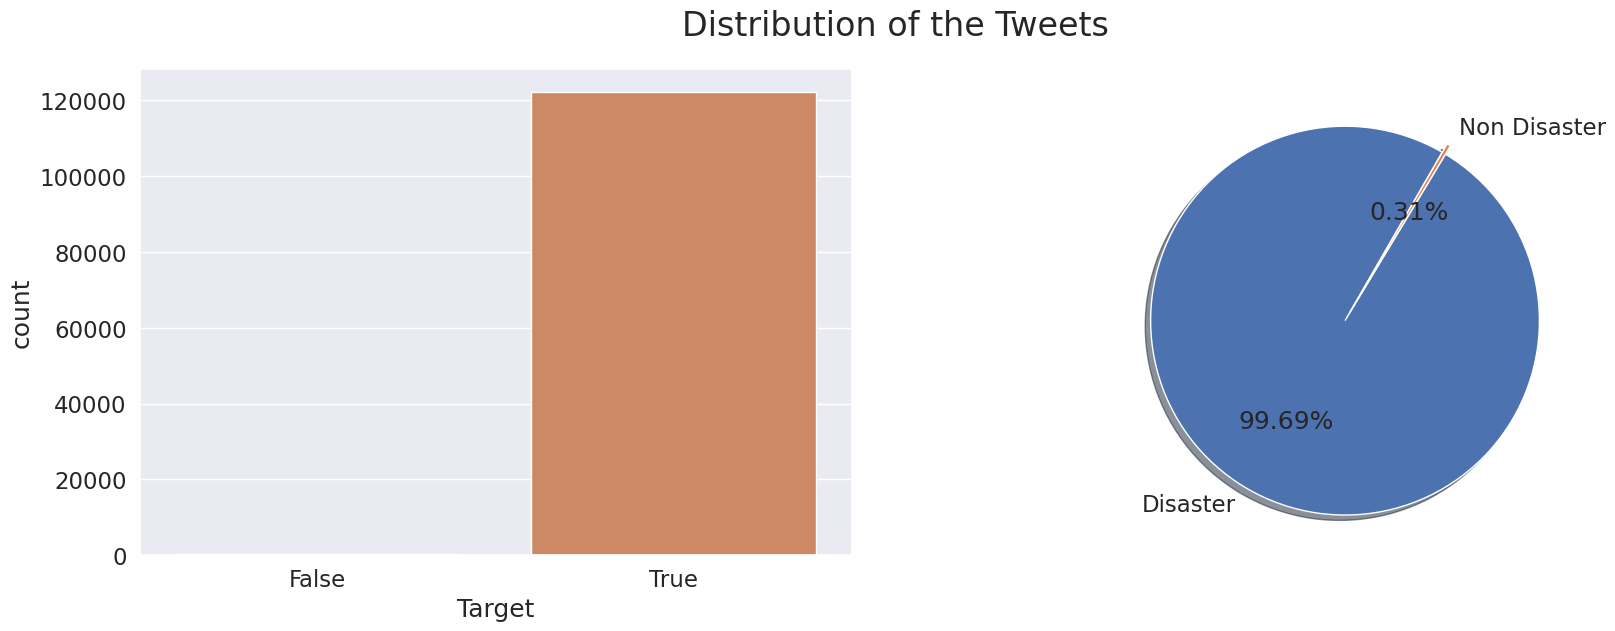

In [ ]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(trainv['Target'], ax=axes[0])
axes[1].pie(trainv['Target'].value_counts(),
            labels=['Disaster', 'Non Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

In [ ]:
!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
trainv['Character Count'] = trainv['Tweet_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

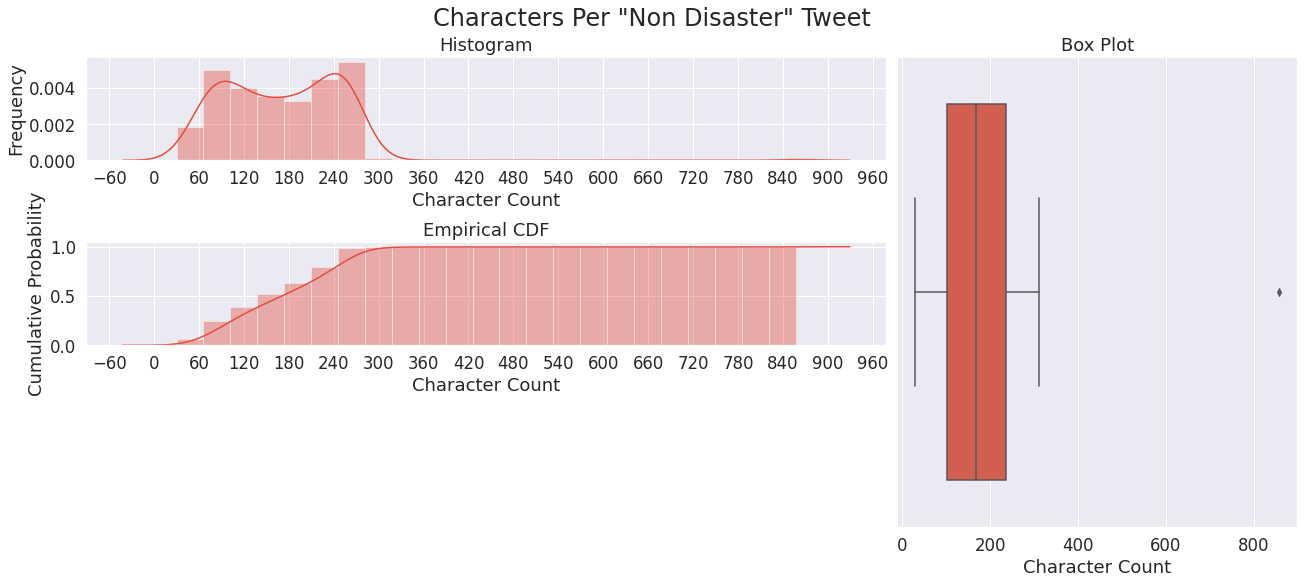

In [ ]:
plot_dist3(trainv[trainv['Target'] == 0], 'Character Count',
           'Characters Per "Non Disaster" Tweet')

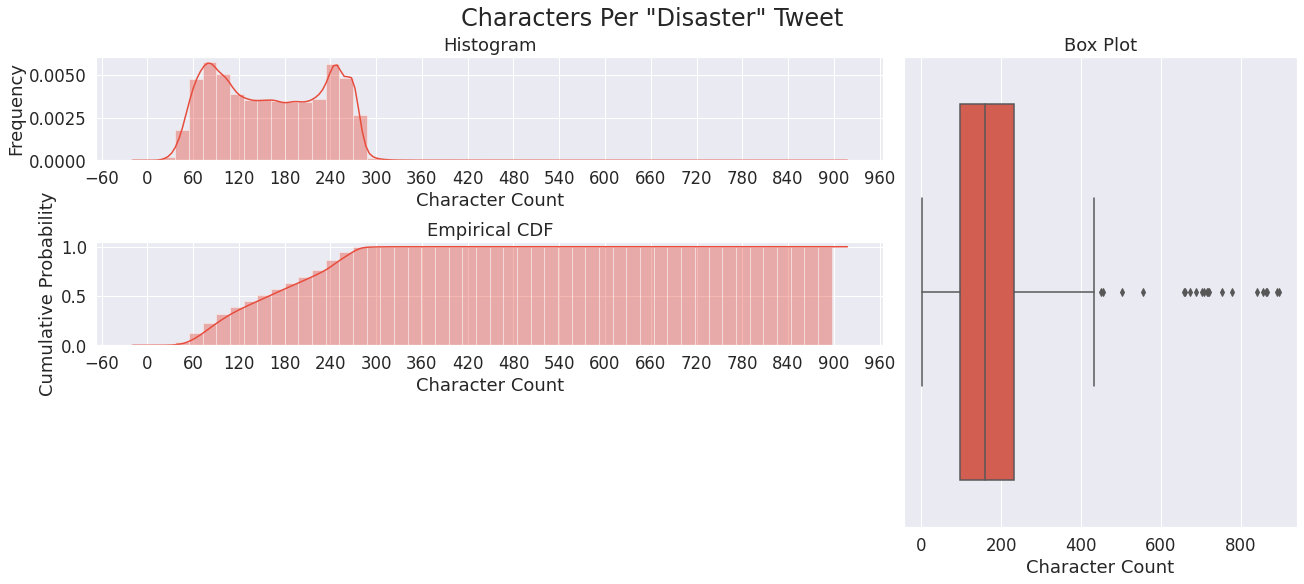

In [ ]:
plot_dist3(trainv[trainv['Target'] == 1], 'Character Count',
           'Characters Per "Disaster" Tweet')

Word Counts

In [ ]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    
    fig.tight_layout()

In [ ]:
def plot_word_len_histogram(textno, textye):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

Word Lengths

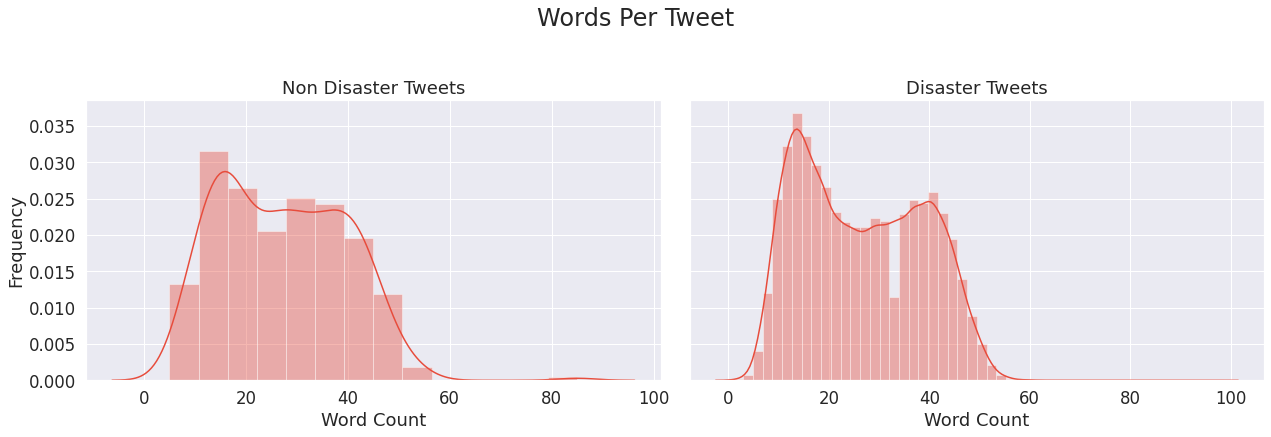

In [ ]:
plot_word_number_histogram(trainv[trainv['Target'] == 0]['Tweet'],
                           trainv[trainv['Target'] == 1]['Tweet'])

In [ ]:
lis = [
    trainv[trainv['Target'] == 0]['Lemma_str'],
    trainv[trainv['Target'] == 1]['Lemma_str']
]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


Most Common Words

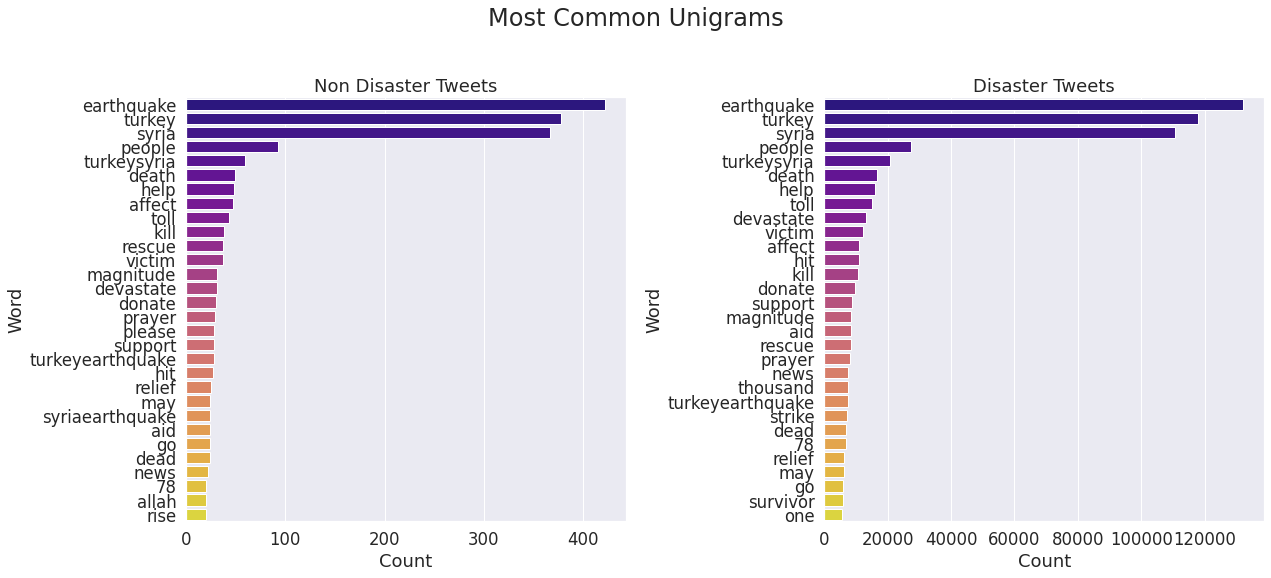

In [ ]:
# Displaying most common words.

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')

axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()


In [ ]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

Most Common Bigrams

In [ ]:
ngrams(2, 'Most Common Bigrams')

Most Common Trigrams

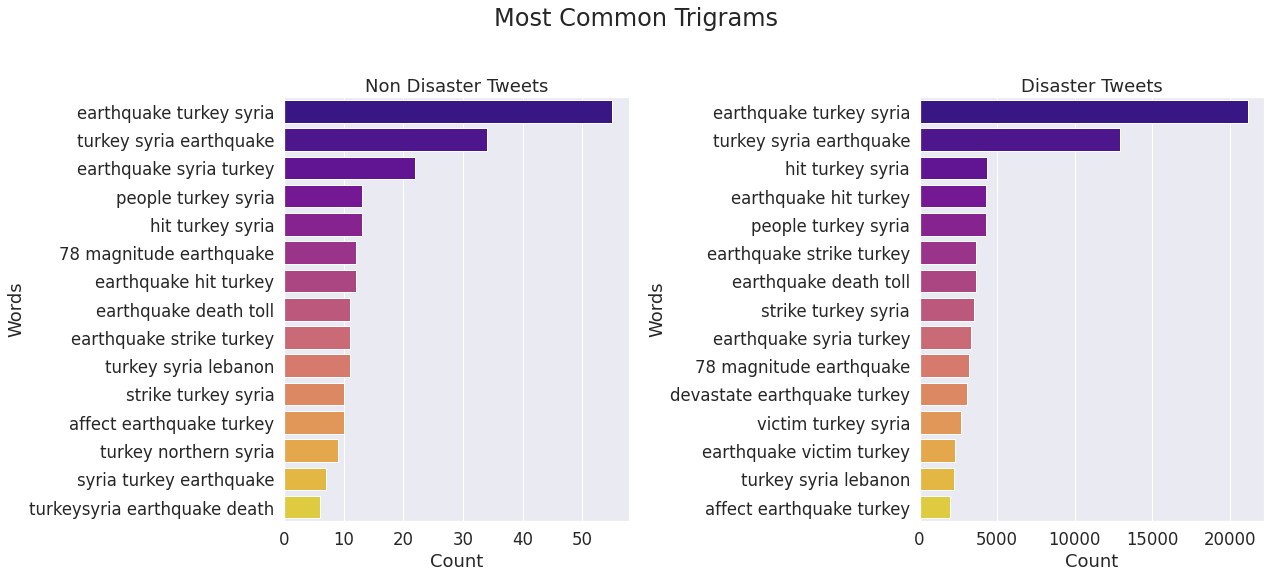

In [ ]:
ngrams(3, 'Most Common Trigrams')

Determining Topics - some extra analysis

In [ ]:
def display_topics(text, no_top_words, topic):
    
    """ A function for determining the topics present in our corpus with nmf """
    
    no_top_words = no_top_words
    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.90, min_df=25, max_features=5000, use_idf=True)
    tfidf = tfidf_vectorizer.fit_transform(text)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    doc_term_matrix_tfidf = pd.DataFrame(
        tfidf.toarray(), columns=list(tfidf_feature_names))
    nmf = NMF(n_components=10, random_state=0, l1_ratio=.1, init='nndsvd').fit(tfidf)

   # nmf = NMF(n_components=10, random_state=0,
    #          alpha=.1, init='nndsvd').fit(tfidf)
    print(topic)
    for topic_idx, topic in enumerate(nmf.components_):
        print('Topic %d:' % (topic_idx+1))
        print(' '.join([tfidf_feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


display_topics(lis[0], 10, 'Non Disaster Topics\n')


In [ ]:
display_topics(lis[1], 10,'Disaster Topics\n')

Word Cloud

In [ ]:
trainv['Lemmatized'] = trainv['Lemmatized'].fillna('').astype(str)

In [ ]:
print(trainv.columns)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


text = ' '.join(trainv[trainv['Target'] == 1]['Lemmatized'])

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = set(stopwords), 
                min_font_size = 10).generate(text)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


Named Entity Recognition

In [ ]:
!python -m spacy download en_core_web_sm


In [ ]:
# Loading NER.
nlp = en_core_web_sm.load() 

In [ ]:
def plot_named_entity_barchart(text):
    
    """A function for extracting named entities and comparing them"""
    
    def _get_ner(text):
        doc = nlp(text)
        return [X.label_ for X in doc.ents]

    ent = text.apply(lambda x: _get_ner(x))
    ent = [x for sub in ent for x in sub]
    counter = Counter(ent)
    count = counter.most_common()

    x, y = map(list, zip(*count))
    sns.barplot(x=y, y=x)

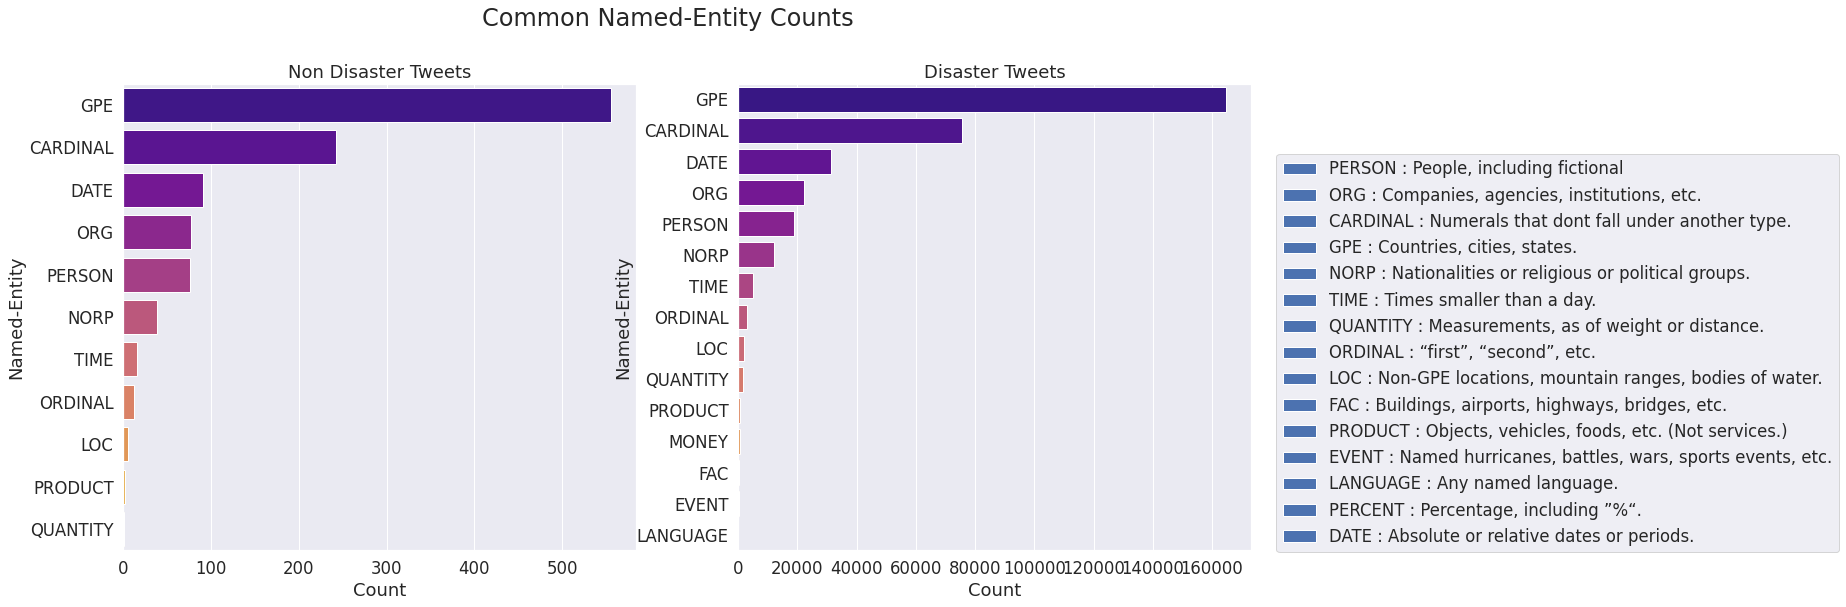

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()
for i, j in zip(lis, axes):

    def _get_ner(i):
        doc = nlp(i)
        return [X.label_ for X in doc.ents]

    ent = i.apply(lambda x: _get_ner(x))
    ent = [x for sub in ent for x in sub]
    counter = Counter(ent)
    count = counter.most_common()[:15]

    x, y = map(list, zip(*count))
    sns.barplot(x=y, y=x, ax=j, palette='plasma')

axes[0].set_title('Non Disaster Tweets')
axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Named-Entity')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Named-Entity')
fig.suptitle('Common Named-Entity Counts', fontsize=24, va='baseline')



patch1 = mpatches.Patch(label='PERSON : People, including fictional')
patch2 = mpatches.Patch(label='ORG : Companies, agencies, institutions, etc.')
patch3 = mpatches.Patch(label='CARDINAL : Numerals that dont fall under another type.')
patch4 = mpatches.Patch(label='GPE : Countries, cities, states.')
patch5 = mpatches.Patch(label='NORP : Nationalities or religious or political groups.')
patch6 = mpatches.Patch(label='TIME : Times smaller than a day.')
patch7 = mpatches.Patch(label='QUANTITY : Measurements, as of weight or distance.')
patch8 = mpatches.Patch(label='ORDINAL : “first”, “second”, etc.')
patch9 = mpatches.Patch(label='LOC : Non-GPE locations, mountain ranges, bodies of water.')
patch10 = mpatches.Patch(label='FAC : Buildings, airports, highways, bridges, etc.')
patch11 = mpatches.Patch(label='PRODUCT : Objects, vehicles, foods, etc. (Not services.)')
patch12 = mpatches.Patch(label='EVENT : Named hurricanes, battles, wars, sports events, etc.')
patch13 = mpatches.Patch(label='LANGUAGE : Any named language.')
patch14 = mpatches.Patch(label='PERCENT : Percentage, including ”%“.')
patch15 = mpatches.Patch(label='DATE : Absolute or relative dates or periods.')



plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13, patch14, patch15, ],bbox_to_anchor=(1.05, 0.85), loc='upper left', borderaxespad=0.)

plt.show()

In [ ]:
trainv.head()

,Index,User_id,Username,Tweet_id,Date,Tweet,Language,Location,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Sentiment Polarity,Processed_tweet,stemmed_tweet,Account_age,Cleaned_text,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str,Target,Character Count
0,27016.0,1877831,nytimesworld,1626955969543470000,3/11/23 2:45 PM,"christian atsu, a ghanaian national who played...",en,"New York, London, Seoul","<a href=""http://www.socialflow.com"" rel=""nofol...",2,3.0,7,[],803,2211027,297076.0,17:08.6,https://twitter.com/nytimesworld/status/162695...,-0.033333,"christian atsu , ghanaian national played turk...","christian atsu , a ghanaian nation who play fo...",21 days 20:17:08.616761,christian atsu a ghanaian national who played ...,christian atsu a ghanaian national who played ...,"[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, a, ghanaian, national, who, ...","[christian, atsu, ghanaian, national, played, ...","[(christian, JJ), (atsu, NN), (ghanaian, JJ), ...","[(christian, a), (atsu, n), (ghanaian, a), (na...","['christian', 'atsu', 'ghanaian', 'national', ...",christian atsu ghanaian national play turkish ...,True,199
1,67856.0,612757677,rrm0x,1624041295042820000,3/11/23 1:43 PM,"turkey-syria earthquake: europe, with billions...",en,Brasil,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0,[],1421,1211,25032.0,45:20.1,https://twitter.com/rrm0x/status/1624041295042...,0.350000,"turkey-syria earthquake : europe , billions wa...","turkey-syria earthquak : europ , with billion ...",29 days 20:45:20.119240,turkeysyria earthquake europe with billions fo...,turkeysyria earthquake europe with billions fo...,"[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, with, billio...","[turkeysyria, earthquake, europe, billions, wa...","[(turkeysyria, NNS), (earthquake, NN), (europe...","[(turkeysyria, n), (earthquake, n), (europe, v...","['turkeysyria', 'earthquake', 'europe', 'billi...",turkeysyria earthquake europe billion war show...,True,82
2,41760.0,123038255,alicerawsthorn,1625418462695760000,3/11/23 8:55 AM,design and earthquakes | 2. a key design innov...,en,London,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,1,[],88,22397,11189.0,27:09.4,https://twitter.com/alicerawsthorn/status/1625...,0.000000,design earthquakes | 2. key design innovation ...,design and earthquak | 2. a key design innov t...,25 days 20:27:09.418596,design and earthquakes a key design innovati...,design and earthquakes 2 a key design innovat...,"[design, and, earthquakes, 2, a, key, design, ...","[design, and, earthquakes, 2, a, key, design, ...","[design, earthquakes, 2, key, design, innovati...","[(design, NN), (earthquakes, VBZ), (2, CD), (k...","[(design, n), (earthquakes, v), (2, n), (key, ...","['design', 'earthquakes', '2', 'key', 'design'...",design earthquakes 2 key design innovation hel...,True,254
3,151463.0,1696349570,Distribucionyma,1622583693582780000,3/11/23 1:11 PM,"over 1,000 dead in turkey, syria after powerfu...",en,Spain,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",0,0.0,0,[],55839,56228,206119.0,43:43.4,https://twitter.com/Distribucionyma/status/162...,0.050000,"1,000 dead turkey , syria powerful earthquakes...","over 1,000 dead in turkey , syria after power ...",33 days 21:43:43.397973,over dead in turkey syria after powerful earth...,over 1000 dead in turkey syria after powerful ...,"[over, 1000, dead, in, turkey, syria, after, p...","[over, 1000, dead, in, turkey, syria, after, p...","[1000, dead, turkey, syria, powerful, earthqua...","[(1000, CD), (dead, JJ), (turkey, NN), (syria,...","[(1000, n), (dead, a), (turkey, n), (syria, n)...","['1000', 'dead', 'turkey', 'syria', 'powerful'...",1000 dead turkey syria powerful earthquake,True,58
4,118646.0,1298772028493900000,IamManuelClay_,1622900511438410000,3/11/23 10:10 AM,powerful earthquakes have struck a large porti...,en,In